# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

### Откройте файл с данными и изучите общую информацию. 

In [1]:
#Импортируем библиотеку pandas
import pandas as pd
#Импортируем библиотеку matplotlib
import matplotlib.pyplot as plt

In [2]:
#Читаем csv файл
data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
#Выводим первые 5 строк датасета
print(data.head())

   total_images  last_price  total_area first_day_exposition  rooms  \

0            20  13000000.0       108.0  2019-03-07T00:00:00      3   

1             7   3350000.0        40.4  2018-12-04T00:00:00      1   

2            10   5196000.0        56.0  2015-08-20T00:00:00      2   

3             0  64900000.0       159.0  2015-07-24T00:00:00      3   

4             2  10000000.0       100.0  2018-06-19T00:00:00      2   



   ceiling_height  floors_total  living_area  floor is_apartment  ...  \

0            2.70          16.0         51.0      8          NaN  ...   

1             NaN          11.0         18.6      1          NaN  ...   

2             NaN           5.0         34.3      4          NaN  ...   

3             NaN          14.0          NaN      9          NaN  ...   

4            3.03          14.0         32.0     13          NaN  ...   



   kitchen_area  balcony    locality_name  airports_nearest  \

0          25.0      NaN  Санкт-Петербург           1886

In [3]:
#Получаем информацию о датасете при помощи метода info()
display(data)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9,9700000.0,133.81,2017-03-21T00:00:00,3,3.70,5.0,73.3,3,NaN,...,13.83,NaN,Санкт-Петербург,24665.0,4232.0,1.0,796.0,3.0,381.0,NaN
23695,14,3100000.0,59.00,2018-01-15T00:00:00,3,NaN,5.0,38.0,4,NaN,...,8.50,NaN,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,45.0
23696,18,2500000.0,56.70,2018-02-11T00:00:00,2,NaN,3.0,29.7,1,NaN,...,NaN,NaN,село Рождествено,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23697,13,11475000.0,76.75,2017-03-28T00:00:00,2,3.00,17.0,NaN,12,NaN,...,23.30,2.0,Санкт-Петербург,39140.0,10364.0,2.0,173.0,3.0,196.0,602.0


In [4]:
#Получаем информацию о датасете при помощи метода info()
data.info()

<class 'pandas.core.frame.DataFrame'>

RangeIndex: 23699 entries, 0 to 23698

Data columns (total 22 columns):

 #   Column                Non-Null Count  Dtype  

---  ------                --------------  -----  

 0   total_images          23699 non-null  int64  

 1   last_price            23699 non-null  float64

 2   total_area            23699 non-null  float64

 3   first_day_exposition  23699 non-null  object 

 4   rooms                 23699 non-null  int64  

 5   ceiling_height        14504 non-null  float64

 6   floors_total          23613 non-null  float64

 7   living_area           21796 non-null  float64

 8   floor                 23699 non-null  int64  

 9   is_apartment          2775 non-null   object 

 10  studio                23699 non-null  bool   

 11  open_plan             23699 non-null  bool   

 12  kitchen_area          21421 non-null  float64

 13  balcony               12180 non-null  float64

 14  locality_name         23650 non-null  object 

 15 

In [5]:
pd.DataFrame(round(data.isna().mean().sort_values(ascending=False)*100,1)).style.background_gradient('coolwarm')

,0
is_apartment,88.300000
parks_nearest,65.900000
ponds_nearest,61.600000
balcony,48.600000
ceiling_height,38.800000
airports_nearest,23.400000
cityCenters_nearest,23.300000
ponds_around3000,23.300000
parks_around3000,23.300000
days_exposition,13.400000


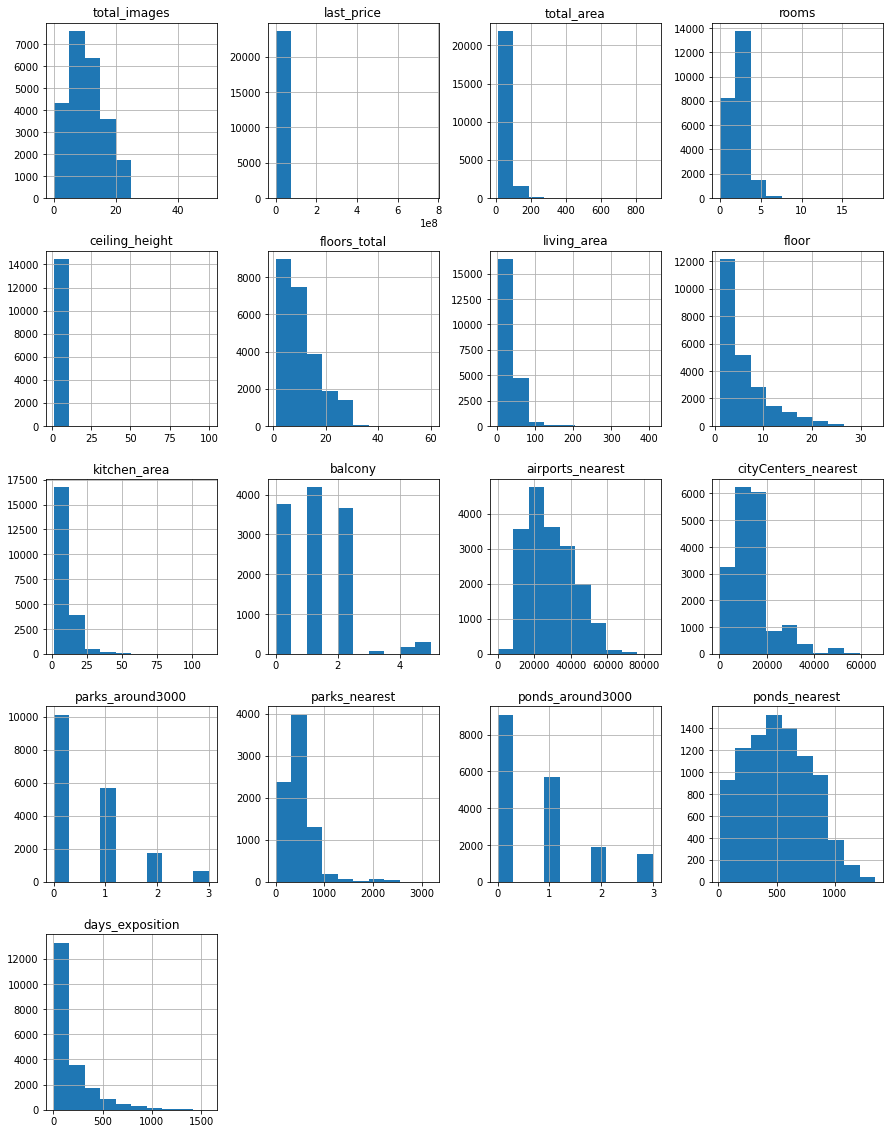

In [6]:
#Построение гистрограммы
data.hist(figsize=(15, 20))
plt.show()

При выводе датасета, первых 5 строк, и изучения файла методом info(), можно сделать вывод, что в некоторые столбцы имеют нерпавильный формат типа данных или же нулевые значения, а именно:
1. first_day_exposition - вместо object, должен быть тип данных datatime;
2. ceiling_height - присутствуют нулевые значения;
3. floors_total - вместо float64, должен быть тип данных int64;
4. living_area - присутствуют нулевые значения;
5. is_apartment - присутствуют нулевые значения и тип данных должен быть bool, а не object; +
6. kitchen_area - присутствуют нулевые значения;
7. balcony - присутствуют нулевые значения и тип данных заменить на int64; +
8. locality_name - присутствуют нулевые значения;
9. airports_nearest - присутствуют нулевые значения;
10. cityCenters_nearest - присутствуют нулевые значения;
11. parks_around3000 - присутствуют нулевые значения и тип данных должен быть int64, а не float64;
12. parks_nearest - присутствуют нулевые значения;
13. ponds_around3000 - присутствуют нулевые значения и тип данных должен быть int64, а не float64;
14. ponds_nearest - присутствуют нулевые значения;
15. days_exposition - присутствуют нулевые значения и тип данных должен быть int64, а не float64.

### Предобработка данных

**Выведем таблицу и проверим наименования всех столбоцов.**

In [7]:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [8]:
#Приводим столбцы в змеиному_регистру.
data = data.rename(columns={'cityCenters_nearest': 'city_centers_nearest', 'parks_around3000': 'parks_around_3000', 'ponds_around3000': 'ponds_around_3000'})

In [9]:
#Проверяем на явные дубликаты.
data.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
23694    False
23695    False
23696    False
23697    False
23698    False
Length: 23699, dtype: bool

In [10]:
#Проверяем на явные дубликаты.
data[data.duplicated()]
#Проверим значения столбцов
data['living_area'].value_counts()
data['total_images'].value_counts()
data['floors_total'].value_counts()
data['floor'].value_counts()
data['is_apartment'].value_counts()
data['total_area'].value_counts()
data['rooms'].value_counts()
data['airports_nearest'].value_counts()
data['city_centers_nearest'].value_counts()
data['parks_around_3000'].value_counts()
data['parks_nearest'].value_counts()
data['ponds_around_3000'].value_counts()
#Эти столбцы пока что оставим такими, какие они есть.

#Удаляем пропуски в столбце floors_total и меняем тип данных на int.
data.dropna(subset=['floors_total'], inplace=True)
data['floors_total'] = data['floors_total'].astype('int')
#Заменим пропуски в balcony на 0 и поменяем типа данных.
data['balcony'] = data['balcony'].fillna(0).astype('int')
#Заменим пропуски в days_exposition на 0 и поменяем типа данных.
data['days_exposition'] = data['days_exposition'].fillna(0).astype('int')
#Заполняем пропуски в столбце is_apartment на False.
data['is_apartment'].fillna(False, inplace=True)
#Заполним пропуски в ceiling_height на медианные.
data['ceiling_height'] = data['ceiling_height'].fillna(value=data['ceiling_height'].median())
#Заполним пропуски в parks_around_3000 на 0 и заменяем тип данных на int.
data['parks_around_3000'] = data['parks_around_3000'].fillna(0).astype('int')
#Заполним пропуски в ponds_around_3000 на 0 и заменяем тип данных на int.
data['ponds_around_3000'] = data['parks_around_3000'].fillna(0).astype('int')
#Поменяем тип данных на int в столбце last_price.
data['last_price'] = data['last_price'].astype('int')
# Заменяем пустые значения жилой площади и площади кухни
lv = data['living_area'].median() / data['total_area'].median()
kt = data['kitchen_area'].median() / data['total_area'].median()
data['living_area'].fillna(lv * data['total_area'], inplace=True)
data['kitchen_area'].fillna(lv * data['total_area'], inplace=True)
#Поменяем тип данных в столбце first_day_exposition.
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format = '%Y-%m-%d')
#Заполняем пропуски в стоблце ceiling_height при помощи медианных значений относительно населенных пунктов
for x in data['locality_name'].unique():
    median_chisla = data.loc[data['locality_name'] == x, 'ceiling_height'].median()
    data.loc[(data['ceiling_height'].isna()) & (data['locality_name'] == x), 'ceiling_height'].median()
#Удаляем пропуски в столбце locality_name.
data.dropna(subset=['locality_name'], inplace=True)
#Переименовываем
data = data.apply(lambda x: x.replace({'поселок':'посёлок', 'городской посёлок': 'посёлок', 'посёлок городского типа': 'посёлок', 'коттеджный посёлок': 'посёлок', 'посёлок при железнодорожной станции': 'посёлок станции'}, regex=True))
#Проверяем
data['locality_name'].unique()

pd.DataFrame(round(data.isna().mean().sort_values(ascending=False)*100,1)).style.background_gradient('coolwarm')

,0
parks_nearest,65.900000
ponds_nearest,61.700000
airports_nearest,23.400000
city_centers_nearest,23.300000
total_images,0.000000
last_price,0.000000
ponds_around_3000,0.000000
parks_around_3000,0.000000
locality_name,0.000000
balcony,0.000000


In [11]:
#Проверяем на пропуски и смену типа данных.
display(data.isna().sum())
display(data.info())

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area                 0
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area                0
balcony                     0
locality_name               0
airports_nearest         5524
city_centers_nearest     5501
parks_around_3000           0
parks_nearest           15535
ponds_around_3000           0
ponds_nearest           14529
days_exposition             0
dtype: int64

<class 'pandas.core.frame.DataFrame'>

Int64Index: 23565 entries, 0 to 23698

Data columns (total 22 columns):

 #   Column                Non-Null Count  Dtype         

---  ------                --------------  -----         

 0   total_images          23565 non-null  int64         

 1   last_price            23565 non-null  int64         

 2   total_area            23565 non-null  float64       

 3   first_day_exposition  23565 non-null  datetime64[ns]

 4   rooms                 23565 non-null  int64         

 5   ceiling_height        23565 non-null  float64       

 6   floors_total          23565 non-null  int64         

 7   living_area           23565 non-null  float64       

 8   floor                 23565 non-null  int64         

 9   is_apartment          23565 non-null  bool          

 10  studio                23565 non-null  bool          

 11  open_plan             23565 non-null  bool          

 12  kitchen_area          23565 non-null  float64       

 13

None

1. Привели некоторые столбцы к змеиному_регистру.
2. Во многих столбцах заменяли значение либо на ноль, либо удалял пропущенные значения.
3. Некоторые столбцы заменил на медианное значение, т.к. оно более устойчивое к выбросам, нежели среднее арифметическое.
4. Для более удобного вычисления поменяли тип данных в некоторые столбцах с float на int.
* Теперь с данными стало работать куда проще и можно перейти к следующему шагу.

### Посчитайте и добавьте в таблицу новые столбцы

In [12]:
#Высчитаем цену одного квадратного метра
data['price_for_one_meter'] = (data['last_price'] / data['total_area']).astype('int')
#Создаем столбец по дню побликации
data['day_of_week'] = data['first_day_exposition'].dt.dayofweek
#Создаем столбец по месяцу побликации
data['month'] = data['first_day_exposition'].dt.month
#Создаем столбец по году побликации
data['year'] = data['first_day_exposition'].dt.year


#Сделаем категоризацию этажей:
def floors_category(i):
    if i['floor'] == 1:
        return 'Первый этаж'
    elif i['floor'] == i['floors_total']:
        return 'Последний этаж'
    else: 
        return 'Другой'
data['floors_category'] = data.apply(floors_category, axis=1)
#Добавим стобец расстояния в км
data['city_centers_km'] = round(data['city_centers_nearest'] / 1000, 0)

### Проведите исследовательский анализ данных

Изучаем следующие параметры:
1. общая площадь total_area;
2. жилая площадь living_area;
3. площадь кухни kitchen_area;
4. цена объекта last_price;
5. количество комнат rooms;
6. высота потолков ceiling_height;
7. этаж квартиры floor;
8. тип этажа квартиры floors_category;
9. общее количество этажей в доме floors_total;
10. расстояние до центра города в метрах city_centers_nearest;
11. расстояние до ближайшего аэропорта airports_nearest;
12. расстояние до ближайшего парка ponds_nearest;
13. день публикации объявления day_of_week;
14. месяц публикации объявления month. 

In [13]:
data[['last_price', 'total_area', 'living_area', 'kitchen_area', 'rooms', 'ceiling_height', 'floor', 'floors_category', 'floors_total', 'city_centers_nearest', 'airports_nearest', 'ponds_nearest', 'day_of_week', 'month']].describe()

,last_price,total_area,living_area,kitchen_area,rooms,ceiling_height,floor,floors_total,city_centers_nearest,airports_nearest,ponds_nearest,day_of_week,month
count,2.356500e+04,23565.000000,23565.000000,23565.000000,23565.000000,23565.000000,23565.000000,23565.000000,18064.000000,18041.000000,9036.000000,23565.000000,23565.000000
mean,6.540058e+06,60.322824,34.621108,12.645370,2.070656,2.724530,5.878124,10.675875,14192.656056,28797.082701,518.289509,2.567367,6.401570
std,1.091093e+07,35.657060,22.399827,11.238595,1.078591,0.991026,4.871485,6.594823,8613.348153,12632.499735,278.009558,1.788279,3.492948
min,1.219000e+04,12.000000,2.000000,1.300000,0.000000,1.000000,1.000000,1.000000,181.000000,0.000000,13.000000,0.000000,1.000000
25%,3.400000e+06,40.000000,19.000000,7.300000,1.000000,2.600000,2.000000,5.000000,9238.000000,18565.000000,293.000000,1.000000,3.000000
50%,4.646000e+06,52.000000,30.000000,10.000000,2.000000,2.650000,4.000000,9.000000,13096.500000,26757.000000,503.000000,3.000000,6.000000
75%,6.790000e+06,69.700000,42.115385,13.350000,3.000000,2.700000,8.000000,16.000000,16285.000000,37273.000000,730.000000,4.000000,10.000000
max,7.630000e+08,900.000000,409.700000,288.461538,19.000000,100.000000,33.000000,60.000000,65968.000000,84869.000000,1344.000000,6.000000,12.000000


1. Значения, которые лежат в диапозоне 25-75% допустимы.
2. В минимальных и максимальных значениях некоторых параметров лежат аномальные значения, но они спорные. К примеру, взять столбец total_area, вдруг существует квартира 900 кв м? 

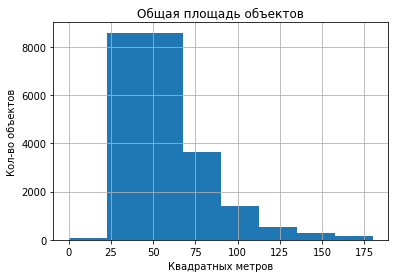

In [14]:
#Гисторамма для общей площади.
data['total_area'].hist(bins=8, grid = True, range=(0, 180))
plt.xlabel('Квадратных метров')
plt.ylabel('Кол-во объектов')
plt.title('Общая площадь объектов')
plt.show()

Наибольшая доля объявлений выпадает на общую площадь в 25 до 50 квадратных метров. 

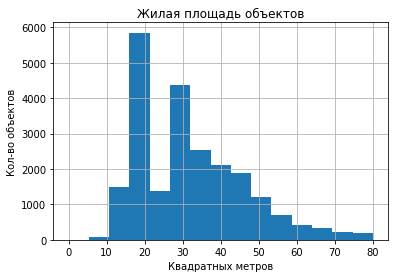

In [15]:
#Гисторамма для жилой площади.
data['living_area'].hist(bins=15, grid = True, range=(0, 80))
plt.xlabel('Квадратных метров')
plt.ylabel('Кол-во объектов')
plt.title('Жилая площадь объектов')
plt.show()

Наибольшая доля объявлений выпадает на жилую площадь с 17/18 до 47/48 метров квадратных, но пики находятся у объявлений с 20 и 30 квадратными метрами.

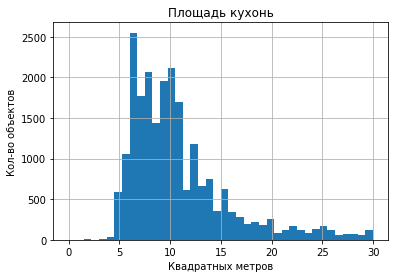

In [16]:
#Гисторамма для площади кухни.
data['kitchen_area'].hist(bins=40, grid = True, range=(0, 30))
plt.xlabel('Квадратных метров')
plt.ylabel('Кол-во объектов')
plt.title('Площадь кухонь')
plt.show()

Наибольшая доля объявлений выпадает на кухню с площадью от 5 до 10 квадратных метров.

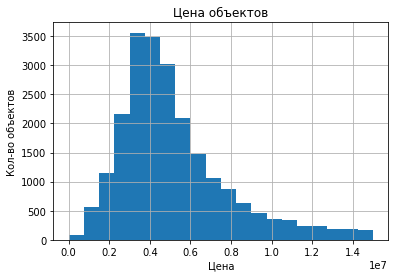

In [17]:
#Гисторамма для цены объектов.
data['last_price'].hist(bins=20, grid = True, range=(0, 15000000))
plt.xlabel('Цена')
plt.ylabel('Кол-во объектов')
plt.title('Цена объектов')
plt.show()

Наибольшая доля объявлений выпадает на цены объектов приблизительно от 3 до 6 миллионов рублей.

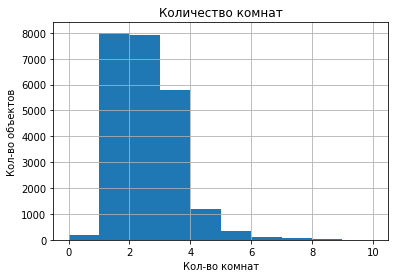

In [18]:
#Гисторамма для количества комнат.
data['rooms'].hist(bins=10, grid = True, range=(0, 10))
plt.xlabel('Кол-во комнат')
plt.ylabel('Кол-во объектов')
plt.title('Количество комнат')
plt.show()

Наибольшая доля объявлений по количеству комнат выпадает от 1 до 3 комнат, но пик достигает больше у квартир, где 1-2 комнаты.

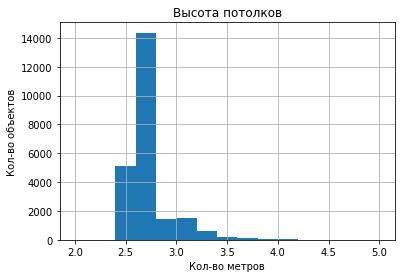

In [19]:
#Гисторамма для высоты потолков.
data['ceiling_height'].hist(bins=15, grid = True, range=(2, 5))
plt.xlabel('Кол-во метров')
plt.ylabel('Кол-во объектов')
plt.title('Высота потолков')
plt.show()

Наибольшая доля объявлений по высоте потолков выпадает приблизительно на 2.6-2.7 метра.

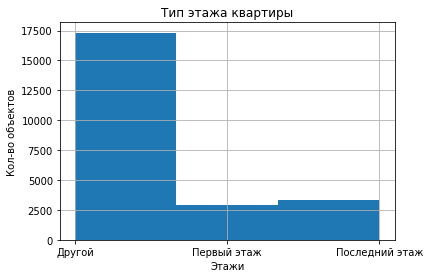

In [20]:
#Гисторамма для типа этажа квартиры.
data['floors_category'].hist(bins=3, grid = True)
plt.xlabel('Этажи')
plt.ylabel('Кол-во объектов')
plt.title('Тип этажа квартиры')
plt.show()

Наибольшая доля квартир расположена между первым и последним этажом.

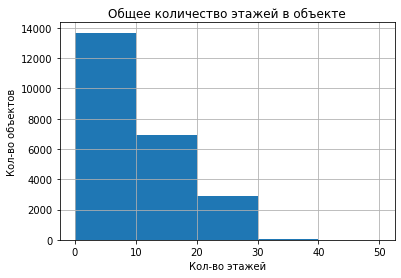

In [21]:
#Гисторамма для общего количества этажей в объекте.
data['floors_total'].hist(bins=5, grid = True, range=(0, 50))
plt.xlabel('Кол-во этажей')
plt.ylabel('Кол-во объектов')
plt.title('Общее количество этажей в объекте')
plt.show()

Наибольшая доля объектов имеет не более 10 этажей.

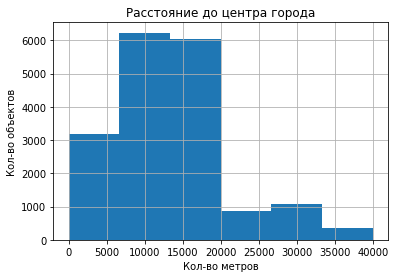

In [22]:
#Гисторамма для расстояния до центра города в метрах.
data['city_centers_nearest'].hist(bins=6, grid = True, range=(0, 40000))
plt.xlabel('Кол-во метров')
plt.ylabel('Кол-во объектов')
plt.title('Расстояние до центра города')
plt.show()

Наибольшая доля объектов имеет расстояния до центра города приблизительно от 6-7 до 12-13 км.

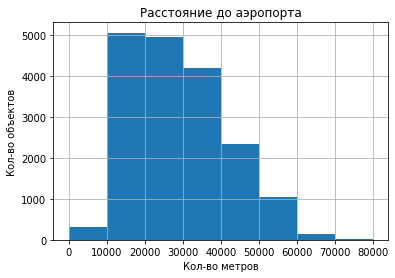

In [23]:
#Гисторамма для расстояния до ближайшего аэропорта.
data['airports_nearest'].hist(bins=8, grid = True, range=(0, 80000))
plt.xlabel('Кол-во метров')
plt.ylabel('Кол-во объектов')
plt.title('Расстояние до аэропорта')
plt.show()

Наибольшая доля объектов имеет расстояния до аэропорта от 10 до 20 км.

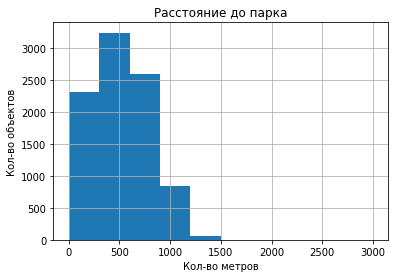

In [24]:
#Гисторамма для расстояния до ближайшего парка.
data['ponds_nearest'].hist(bins=10, grid = True, range=(0, 3000))
plt.xlabel('Кол-во метров')
plt.ylabel('Кол-во объектов')
plt.title('Расстояние до парка')
plt.show()

Большая часть объявление не содержит в себе информации о расстоянии до ближайшего парка. Лишь малая часть указала расстояния и оно не привышает 1,5 км.

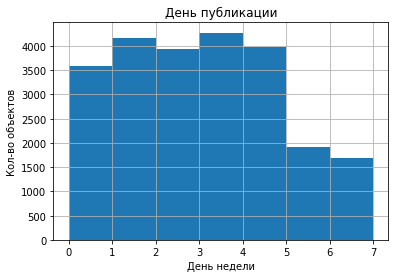

In [25]:
#Гисторамма для дня публикации.
data['day_of_week'].hist(bins=7, grid = True, range=(0, 7))
plt.xlabel('День недели')
plt.ylabel('Кол-во объектов')
plt.title('День публикации')
plt.show()

Объявления появляются куда чаще в будние дни, нежели в выходные.

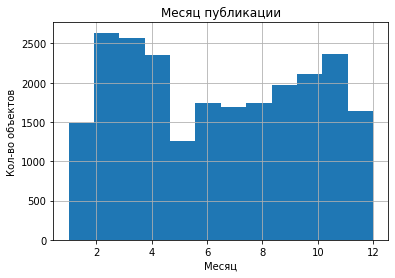

In [26]:
#Гисторамма для месяца публикации.
data['month'].hist(bins=12, grid = True, range=(1, 12))
plt.xlabel('Месяц')
plt.ylabel('Кол-во объектов')
plt.title('Месяц публикации')
plt.show()

Объявления чаще всего выкладывают в следующие месяцы: февраль, март, апрель, сентябрь, октябрь, ноябрь. Меньше всего объявлений приходится на: наименьшее на май, июнь, июль, август, декабрь, январь.

#### "Изучите, как быстро продавались квартиры (столбец days_exposition). Этот параметр показывает, сколько дней «висело» каждое объявление.
1. Постройте гистограмму.
2. Посчитайте среднее и медиану.
3. В ячейке типа markdown опишите, сколько обычно занимает продажа. Какие продажи можно считать быстрыми, а какие — необычно долгими?"

<AxesSubplot:>

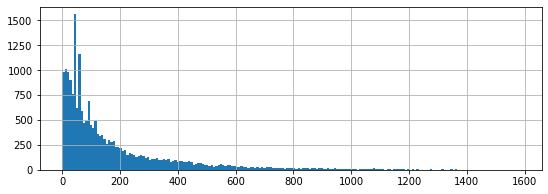

In [27]:
data.query('days_exposition !=0')['days_exposition'].hist(bins=200, figsize=(9, 3))

In [28]:
data.query('days_exposition !=0')['days_exposition'].describe()

count    20394.000000
mean       180.741395
std        219.732782
min          1.000000
25%         45.000000
50%         95.000000
75%        231.000000
max       1580.000000
Name: days_exposition, dtype: float64

Изучив гистрограмму, Q1, Q2 и Q3, можно сделать следующие выводы:
1. Самая быстрая продажа происходила в течении 45 дней.
2. В среднем продажа происходила в течении 95 дней.
3. 233 дня и более указывает на явные аномальные значения и долгие продажи.

####  "Какие факторы больше всего влияют на общую (полную) стоимость объекта? Постройте графики, которые покажут зависимость цены от указанных ниже параметров. Для подготовки данных перед визуализацией вы можете использовать сводные таблицы."
  - общей площади;
  - жилой площади;
  - площади кухни;
  - количество комнат;
  - типа этажа, на котором расположена квартира (первый, последний, другой);
  - даты размещения (день недели, месяц, год);

Корреляция стоимости и общей площади объекта: 0.6536213939252808


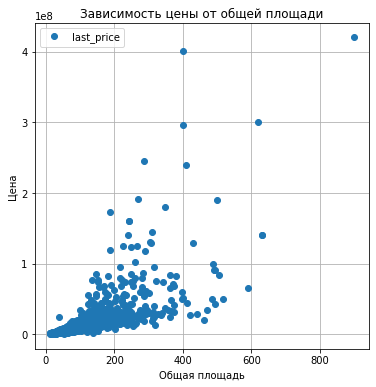

In [29]:
#Построение графика зависимости цены от общей площади
print('Корреляция стоимости и общей площади объекта:', data['total_area'].corr(data['last_price']))
(data.pivot_table(values='last_price', index='total_area', aggfunc='mean')
.plot(grid=True, style= 'o', figsize=(6, 6))
.set(xlabel='Общая площадь', ylabel='Цена', title='Зависимость цены от общей площади'))
plt.show()

Корреляция стоимости и жилой площади: 0.5857830307420002


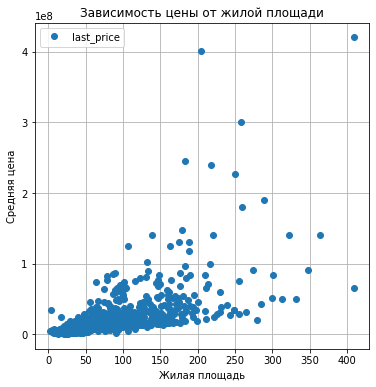

In [30]:
#Построение сводной таблицы и графика зависимости цены от жилой площади
print('Корреляция стоимости и жилой площади:', data['living_area'].corr(data['last_price']))
(data.pivot_table(values='last_price', index='living_area', aggfunc='mean')
.plot(grid=True, style= 'o', figsize=(6, 6))
.set(xlabel='Жилая площадь', ylabel='Средняя цена', title='Зависимость цены от жилой площади'))
plt.show()

Корреляция стоимости и площадь кухни: 0.40399594465846533


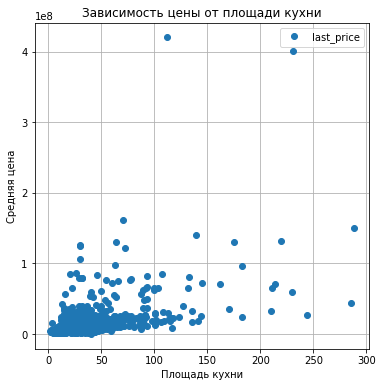

In [31]:
#Построение сводной таблицы и графика зависимости цены от площади кухни
print('Корреляция стоимости и площадь кухни:', data['kitchen_area'].corr(data['last_price']))
(data.pivot_table(values='last_price', index='kitchen_area', aggfunc='mean')
.plot(grid=True, style= 'o', figsize=(6, 6))
.set(xlabel='Площадь кухни', ylabel='Средняя цена', title='Зависимость цены от площади кухни'))
plt.show()

Корреляция стоимости и кол-ва комнат: 0.3631905485065752


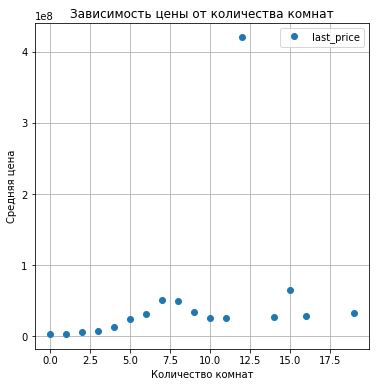

In [32]:
#Построение сводной таблицы и графика зависимости цены от количества комнат
print('Корреляция стоимости и кол-ва комнат:', data['rooms'].corr(data['last_price']))
(data.pivot_table(values='last_price', index='rooms', aggfunc='mean')
.plot(grid=True, style= 'o', figsize=(6, 6))
.set(xlabel='Количество комнат', ylabel='Средняя цена', title='Зависимость цены от количества комнат'))
plt.show()

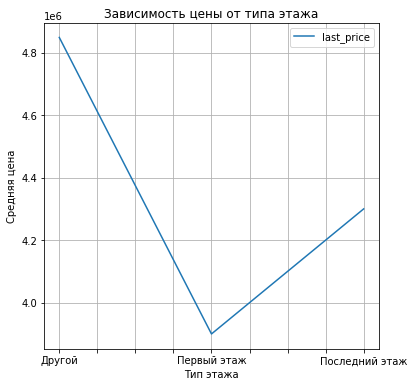

In [33]:
#Посттроение сводной таблицы и графика зависимости цены от типа этажа
(data.pivot_table(values='last_price', index='floors_category', aggfunc='median')
.plot(grid=True, figsize=(6, 6))
.set(xlabel='Тип этажа', ylabel='Средняя цена', title='Зависимость цены от типа этажа'))
plt.show()

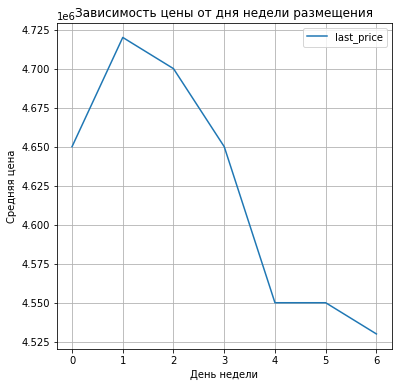

In [34]:
#Построение сводной таблицы и графика зависимости цены от дня недели размещения
(data.pivot_table(values='last_price', index='day_of_week', aggfunc='median')
.plot(grid=True, figsize=(6, 6))
.set(xlabel='День недели', ylabel='Средняя цена', title='Зависимость цены от дня недели размещения'))
plt.show()

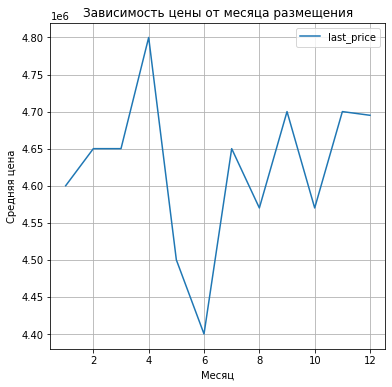

In [35]:
#Построение сводной таблицы и графика зависимости цены от месяца размещения
(data.pivot_table(values='last_price', index='month', aggfunc='median')
.plot(grid=True, figsize=(6, 6))
.set(xlabel='Месяц', ylabel='Средняя цена', title='Зависимость цены от месяца размещения'))
plt.show()

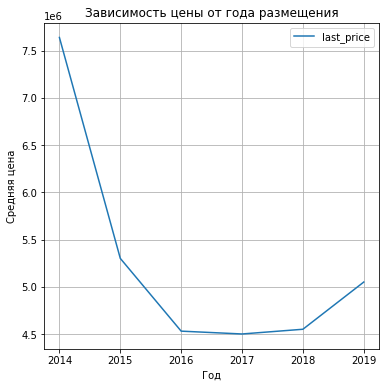

In [36]:
#Построение сводной таблицы и графика зависимости цены от года размещения
(data.pivot_table(values='last_price', index='year', aggfunc='median')
.plot(grid=True, figsize=(6, 6))
.set(xlabel='Год', ylabel='Средняя цена', title='Зависимость цены от года размещения'))
plt.show()

Вывод:
1. При росте жилой площади стоимость увеличивается.
2. На стоимость жилья влияет тип этажа. Например: группа "Другой" значительно дороже группы "Первый этаж".
3. На момент 2014 года квартиры были более дороги, но потом резко привели к спаду цен и только лишь с 2018 года начали подниматься.
4. Самые дорогие объявления выкладываются в апреле, а самые дешевые в мае и июне

#### Посчитайте среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений. Выделите населённые пункты с самой высокой и низкой стоимостью квадратного метра. Эти данные можно найти по имени в столбце `locality_name`.

In [37]:
#Подсчет числа объявлений по населенным пунктам
ads = data['locality_name'].value_counts().head(10).index

#Фильтрация данных для выбранных населенных пунктов
filtered_data = data[data['locality_name'].isin(ads)]

#Расчет средней цены за квадратный метр
filtered_data['price_for_one_meter'] = filtered_data['last_price'] / filtered_data['total_area']
mean_price_of_meter = filtered_data.groupby('locality_name')['price_for_one_meter'].median()

#Населенный пункт с самой высокой стоимостью квадратного метра
highest_price_locality = mean_price_of_meter.idxmax()
highest_price_of_meter = mean_price_of_meter.max()

#Населенный пункт с самой низкой стоимостью квадратного метра
lowest_price_locality = mean_price_of_meter.idxmin()
lowest_price_of_meter = mean_price_of_meter.min()

print("Средняя цена за квадратный метр в 10 населенных пунктах с наибольшим числом объявлений:")
print(mean_price_of_meter.sort_values(ascending=False))

print("\nНаселенный пункт с самой высокой стоимостью квадратного метра:")
print(highest_price_locality, "-", highest_price_of_meter)

print("\nНаселенный пункт с самой низкой стоимостью квадратного метра:")
print(lowest_price_locality, "-", lowest_price_of_meter)

Средняя цена за квадратный метр в 10 населенных пунктах с наибольшим числом объявлений:

locality_name

Санкт-Петербург      104774.535809

Пушкин               100000.000000

деревня Кудрово       91860.465116

посёлок Парголово     91642.857143

посёлок Мурино        86059.293995

посёлок Шушары        76829.268293

Колпино               74723.748474

Гатчина               67796.610169

Всеволожск            65789.473684

Выборг                58158.319871

Name: price_for_one_meter, dtype: float64



Населенный пункт с самой высокой стоимостью квадратного метра:

Санкт-Петербург - 104774.53580901856



Населенный пункт с самой низкой стоимостью квадратного метра:

Выборг - 58158.31987075929


/tmp/ipykernel_199/3890609473.py:8: SettingWithCopyWarning: 

A value is trying to be set on a copy of a slice from a DataFrame.

Try using .loc[row_indexer,col_indexer] = value instead



See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  filtered_data['price_for_one_meter'] = filtered_data['last_price'] / filtered_data['total_area']


Самая дорогая стоимость за квадратный метр находятся в Санкт-Петергбурге, а в Выборге самая дешевая.

####  "Ранее вы посчитали расстояние до центра в километрах. Теперь выделите квартиры в Санкт-Петербурге с помощью столбца `locality_name` и вычислите среднюю цену каждого километра. Опишите, как стоимость объектов зависит от расстояния до центра города."

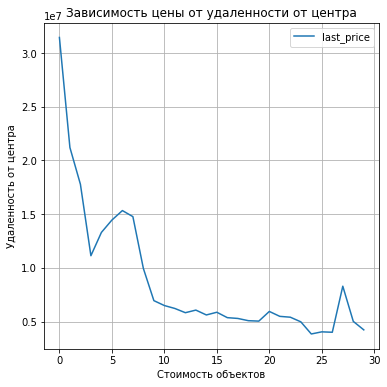

In [38]:
#Фильтрация данных для квартир в Санкт-Петербурге
spb_data = data[data['locality_name'] == 'Санкт-Петербург']

(spb_data.pivot_table(index='city_centers_km', values='last_price', aggfunc='mean')
.plot(grid=True, figsize=(6, 6))
.set(xlabel='Стоимость объектов', ylabel='Удаленность от центра', title='Зависимость цены от удаленности от центра'))
plt.show()


Стоимость недвижимости падает по мере удаленности от центра.

### Результаты исследования:
Мы провели достаточно большой анализ данных. Обработали пропуски, заменили типы данных для удобной работы. Посчитали цены за квадратный метр жилья, добавили категоризацию этажей, вывели из даты дни, месяца и года. зучили следующие параметры на наличие выбивающихся значений - площадь, цена, число комнат, высота потолков. Были определены аномалии в данных параметрах.
1. Люди отдают предпочтение квартире со следующими параметрами: одна или двухкомнатная квартира с общей стоимостью от 3 до 6 млн. руб., цена от 75 до 100 тыс. руб. за кв.м., площадью составляет от 25 до 50 кв.м., жилая площадь в границах от 15 до 45 кв.м., площадь кухни составляет от 5 до 10 кв.м., квартира с потолоком в 2,6 м., в жилом доме с этажностью не более 10 этажей, который расположен 10-15 километрах от центра.
2. Зачастую квартиры рассматривают, которые находятся не на первом и не на последнем этаже.
3. Некоторые данные скрыты владельцами о квартире, к примеру, информация о удаленности от аэропорта часто отсутствует.
4. Объявления о продаже квартире чаще всего выставляют в будние дни, нежели в выходные. Также активность о размещении объявлений приходятся на следующие месяца: февраль, март, апрель, сентябрь, октябрь и ноябрь.
5. Медианный срок продажи квартир составляет около 95 дней.
6. Проведя исследования, выяснилось, что самая дорога недвижимость находится в Санкт-Петербурге, а самая дешевая в Выборге.

**Чек-лист готовности проекта**

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  открыт файл
- [x]  файлы изучены (выведены первые строки, метод `info()`, гистограммы и т.д.)
- [x]  определены пропущенные значения
- [x]  заполнены пропущенные значения там, где это возможно
- [x]  есть пояснение, какие пропущенные значения обнаружены
- [x]  изменены типы данных
- [x]  есть пояснение, в каких столбцах изменены типы и почему
- [x]  устранены неявные дубликаты в названиях населённых пунктов
- [x]  устранены редкие и выбивающиеся значения (аномалии) во всех столбцах
- [x]  посчитано и добавлено в таблицу: цена одного квадратного метра
- [x]  посчитано и добавлено в таблицу: день публикации объявления (0 - понедельник, 1 - вторник и т.д.)
- [x]  посчитано и добавлено в таблицу: месяц публикации объявления
- [x]  посчитано и добавлено в таблицу: год публикации объявления
- [x]  посчитано и добавлено в таблицу: тип этажа квартиры (значения — «первый», «последний», «другой»)
- [x]  посчитано и добавлено в таблицу: расстояние в км до центра города
- [x]  изучены и описаны следующие параметры:
        - общая площадь;
        - жилая площадь;
        - площадь кухни;
        - цена объекта;
        - количество комнат;
        - высота потолков;
        - этаж квартиры;
        - тип этажа квартиры («первый», «последний», «другой»);
        - общее количество этажей в доме;
        - расстояние до центра города в метрах;
        - расстояние до ближайшего аэропорта;
        - расстояние до ближайшего парка;
        - день и месяц публикации объявления
- [x]  построены гистограммы для каждого параметра
- [x]  выполнено задание: "Изучите, как быстро продавались квартиры (столбец days_exposition). Этот параметр показывает, сколько дней «висело» каждое объявление.
    - Постройте гистограмму.
    - Посчитайте среднее и медиану.
    - В ячейке типа markdown опишите, сколько обычно занимает продажа. Какие продажи можно считать быстрыми, а какие — необычно долгими?"
- [x]  выполнено задание: "Какие факторы больше всего влияют на общую (полную) стоимость объекта? Постройте графики, которые покажут зависимость цены от указанных ниже параметров. Для подготовки данных перед визуализацией вы можете использовать сводные таблицы."
        - общей площади;
        - жилой площади;
        - площади кухни;
        - количество комнат;
        - типа этажа, на котором расположена квартира (первый, последний, другой);
        - даты размещения (день недели, месяц, год);
- [x]  выполнено задание: "Посчитайте среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений. Выделите населённые пункты с самой высокой и низкой стоимостью квадратного метра. Эти данные можно найти по имени в столбце `locality_name`."
- [x]  выполнено задание: "Ранее вы посчитали расстояние до центра в километрах. Теперь выделите квартиры в Санкт-Петербурге с помощью столбца `locality_name` и вычислите среднюю цену каждого километра. Опишите, как стоимость объектов зависит от расстояния до центра города."
- [x]  в каждом этапе есть промежуточные выводы
- [x]  есть общий вывод